# Plotting with Pandas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [2]:
file_path = os.path.join("data", "covid")
csv_path = os.path.join(file_path, "WHO-COVID-19-global-data.csv")

In [3]:
df = pd.read_csv(csv_path)
df.columns = [col.strip() for col in df.columns]
df.loc[:, 'Date_reported'] = pd.to_datetime(df.Date_reported)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132246 entries, 0 to 132245
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      132246 non-null  datetime64[ns]
 1   Country_code       131688 non-null  object        
 2   Country            132246 non-null  object        
 3   WHO_region         132246 non-null  object        
 4   New_cases          132246 non-null  int64         
 5   Cumulative_cases   132246 non-null  int64         
 6   New_deaths         132246 non-null  int64         
 7   Cumulative_deaths  132246 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 8.1+ MB


In [4]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
pivot_df = df.pivot(
    index = 'Date_reported',
    columns = 'Country',
    values = ['New_deaths', 'New_cases', 'Cumulative_cases', 'Cumulative_deaths']
)
pivot_df.head()

New_deaths                                                \
Country       Afghanistan Albania Algeria American Samoa Andorra Angola   
Date_reported                                                             
2020-01-03              0       0       0              0       0      0   
2020-01-04              0       0       0              0       0      0   
2020-01-05              0       0       0              0       0      0   
2020-01-06              0       0       0              0       0      0   
2020-01-07              0       0       0              0       0      0   

                                                              ...  \
Country       Anguilla Antigua and Barbuda Argentina Armenia  ...   
Date_reported                                                 ...   
2020-01-03           0                   0         0       0  ...   
2020-01-04           0                   0         0       0  ...   
2020-01-05           0                   0         0       0  ...   
2020-01-06           0                   0         0       0  ...   
2020-01-07           0                   0         0       0  ...   

              Cumulative_deaths                     \
Country                 Uruguay Uzbekistan Vanuatu   
Date_reported                                        
2020-01-03                    0          0       0   
2020-01-04                    0          0       0   
2020-01-05                    0          0       0   
2020-01-06                    0          0       0   
2020-01-07                    0          0       0   

                                                                             \
Country       Venezuela (Bolivarian Republic of) Viet Nam Wallis and Futuna   
Date_reported                                                                 
2020-01-03                                     0        0                 0   
2020-01-04                                     0        0                 0   
2020-01-05                                     0        0                 0   
2020-01-06                                     0        0                 0   
2020-01-07                                     0        0                 0   

                                     \
Country       Yemen Zambia Zimbabwe   
Date_reported                         
2020-01-03        0      0        0   
2020-01-04        0      0        0   
2020-01-05        0      0        0   
2020-01-06        0      0        0   
2020-01-07        0      0        0   

                                                                        
Country       occupied Palestinian territory, including east Jerusalem  
Date_reported                                                           
2020-01-03                                                     0        
2020-01-04                                                     0        
2020-01-05                                                     0        
2020-01-06                                                     0        
2020-01-07                                                     0        

[5 rows x 948 columns]

<AxesSubplot:title={'center':'Number of Covid Cases'}, xlabel='Date_reported'>

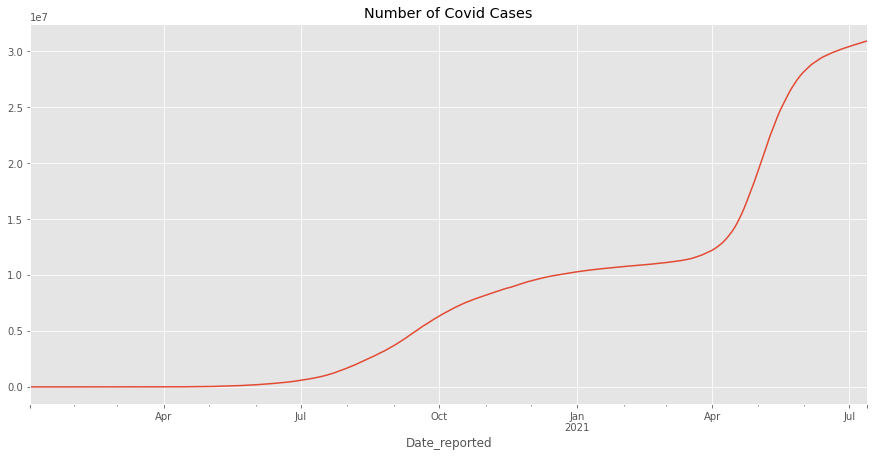

In [6]:
pivot_df.loc[:, ("Cumulative_cases", "India")].plot(title = 'Number of Covid Cases', figsize = (15,7))

In [7]:
# df.set_index('Date_reported', inplace = True)
# df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending = False)
# df.set_index('Date_reported', inplace = True)
df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending = False)

Country
United States of America    33518946
India                       30907282
Brazil                      19089940
Russian Federation           5833175
France                       5700017
                              ...   
Cook Islands                       0
Saint Helena                       0
Tuvalu                             0
Turkmenistan                       0
Pitcairn Islands                   0
Name: Cumulative_cases, Length: 237, dtype: int64

<AxesSubplot:ylabel='Country'>

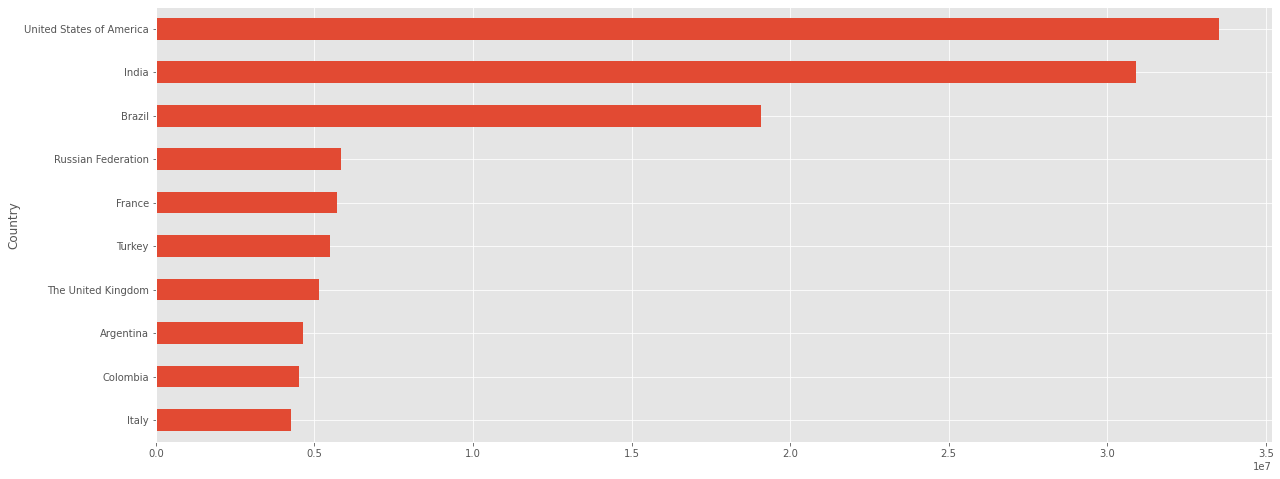

In [8]:
case_count = df.groupby('Country')['Cumulative_cases'].max().sort_values()
case_count.tail(10).plot(kind = 'barh', figsize = (20, 8))

<AxesSubplot:title={'center':'Top 10 Cumulative Cases by Country'}, ylabel='Country'>

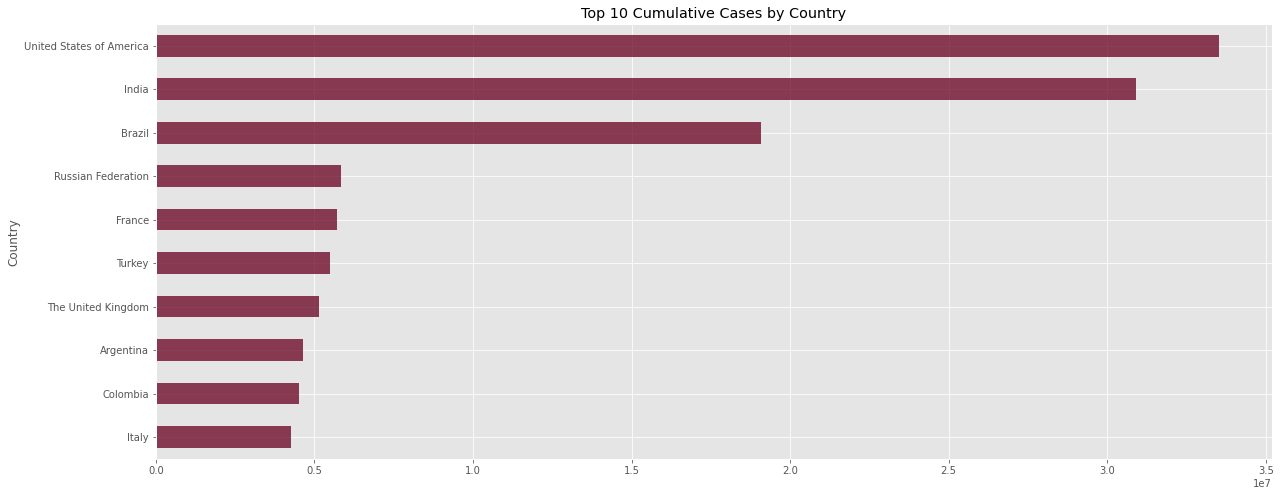

In [9]:
case_count.tail(10).plot(
  kind = 'barh',
  figsize = (20, 8),
  colormap = 'RdBu',
  alpha = 0.75,
  title = 'Top 10 Cumulative Cases by Country'
)

In [10]:
countries = [name for name in case_count.tail(10).index]
countries

['Italy',
 'Colombia',
 'Argentina',
 'The United Kingdom',
 'Turkey',
 'France',
 'Russian Federation',
 'Brazil',
 'India',
 'United States of America']

In [11]:
size_country = list(range((len(countries))))
size_country

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
cases = [case_count.tail(10)[case] for case in range(10)]
cases

[4272163,
 4511960,
 4647948,
 5155247,
 5486959,
 5700017,
 5833175,
 19089940,
 30907282,
 33518946]

Rectangle(xy=(0, -0.4), width=4.27216e+06, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=4.51196e+06, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=4.64795e+06, height=0.8, angle=0)
Rectangle(xy=(0, 2.6), width=5.15525e+06, height=0.8, angle=0)
Rectangle(xy=(0, 3.6), width=5.48696e+06, height=0.8, angle=0)
Rectangle(xy=(0, 4.6), width=5.70002e+06, height=0.8, angle=0)
Rectangle(xy=(0, 5.6), width=5.83318e+06, height=0.8, angle=0)
Rectangle(xy=(0, 6.6), width=1.90899e+07, height=0.8, angle=0)
Rectangle(xy=(0, 7.6), width=3.09073e+07, height=0.8, angle=0)
Rectangle(xy=(0, 8.6), width=3.35189e+07, height=0.8, angle=0)


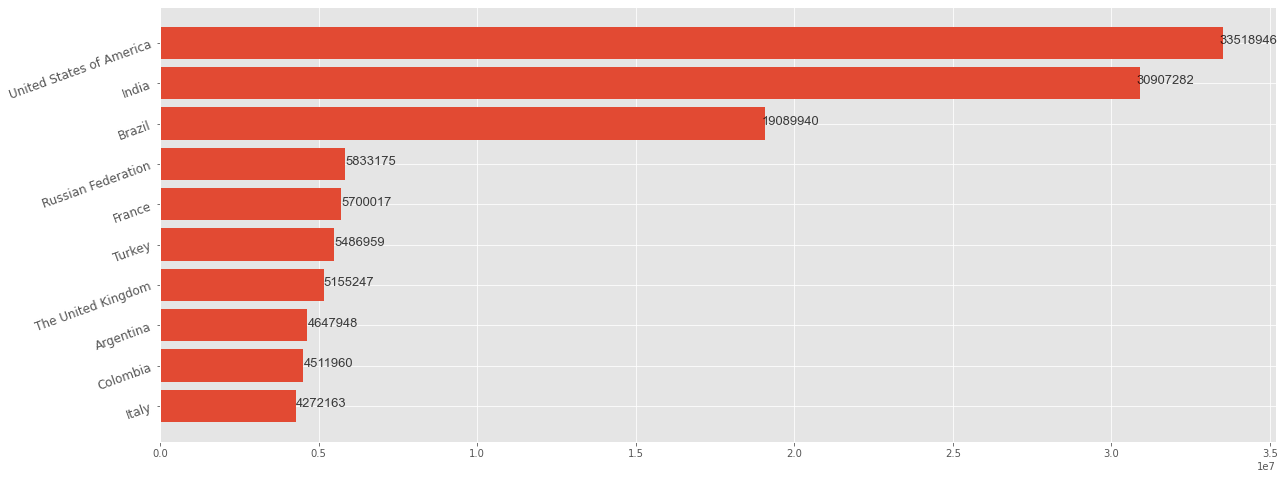

In [13]:
# Create a plot in matplotlib
fig, ax = plt.subplots(figsize = (20, 8))
plt.yticks(size_country, countries, rotation = 20, fontsize = 12)
plot = ax.barh(size_country, cases)
for bar in plot:
    width = bar.get_width()
    ax.text(
        width + 800000,
        bar.get_y() + 0.3,
        f'{int(width)}',
        ha = 'center',
        va = 'bottom',
        fontsize = 13,
        color = 'black',
        alpha = 0.75,
        fontname = 'arial'
    )
for bar in plot:
    print(bar)
plt.show()

In [14]:
mask_uk = df['Country_code'] == 'GB'
df_uk = df.loc[mask_uk]
df_uk = df_uk.replace(to_replace = 'The United Kingdom', value = 'United Kingdom')
df_uk = df_uk.drop(['Country_code', 'WHO_region'], axis = 1)
df_uk

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
117738,2020-01-03,United Kingdom,0,0,0,0
117739,2020-01-04,United Kingdom,0,0,0,0
117740,2020-01-05,United Kingdom,0,0,0,0
117741,2020-01-06,United Kingdom,0,0,0,0
117742,2020-01-07,United Kingdom,0,0,0,0
...,...,...,...,...,...,...
118291,2021-07-09,United Kingdom,31977,5022897,35,128336
118292,2021-07-10,United Kingdom,35200,5058097,29,128365
118293,2021-07-11,United Kingdom,31800,5089897,34,128399
118294,2021-07-12,United Kingdom,31352,5121249,26,128425


In [15]:
df_uk = df_uk.assign(Case_pct_change = df_uk['New_cases'].pct_change())
df_uk

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change
117738,2020-01-03,United Kingdom,0,0,0,0,NaN
117739,2020-01-04,United Kingdom,0,0,0,0,NaN
117740,2020-01-05,United Kingdom,0,0,0,0,NaN
117741,2020-01-06,United Kingdom,0,0,0,0,NaN
117742,2020-01-07,United Kingdom,0,0,0,0,NaN
...,...,...,...,...,...,...,...
118291,2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215
118292,2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791
118293,2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591
118294,2021-07-12,United Kingdom,31352,5121249,26,128425,-0.014088


In [16]:
df_uk = df_uk.set_index('Date_reported')
df_uk

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change
Date_reported,,,,,,
2020-01-03,United Kingdom,0,0,0,0,NaN
2020-01-04,United Kingdom,0,0,0,0,NaN
2020-01-05,United Kingdom,0,0,0,0,NaN
2020-01-06,United Kingdom,0,0,0,0,NaN
2020-01-07,United Kingdom,0,0,0,0,NaN
...,...,...,...,...,...,...
2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215
2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791
2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591


In [17]:
type(df_uk.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date_reported'>

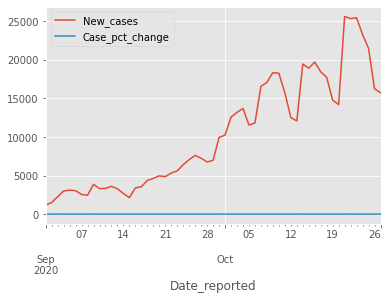

In [18]:
df_uk.loc['2020-09-01':'2020-10-27', ['New_cases', 'Case_pct_change']].plot()

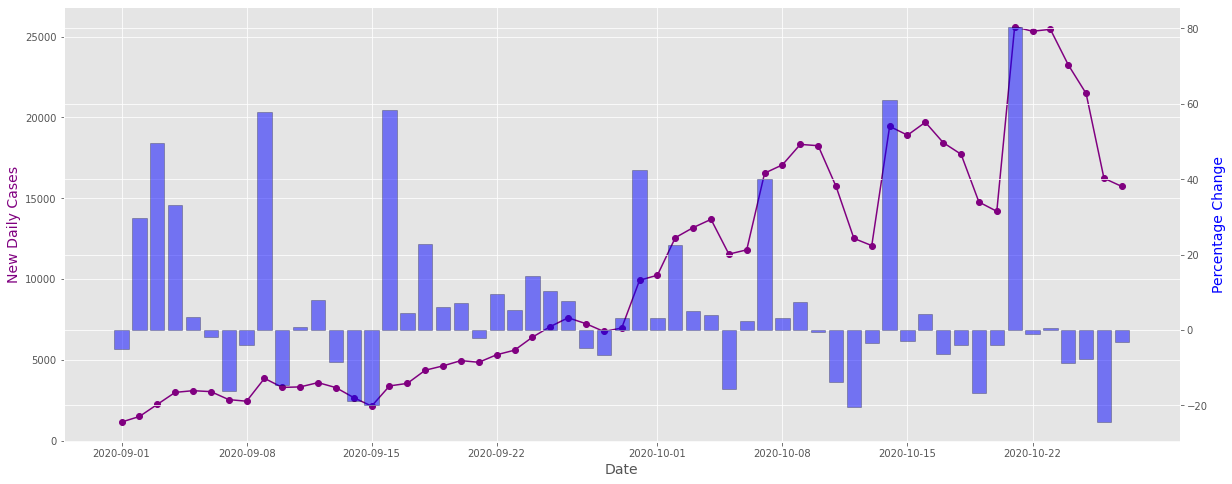

In [19]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20, 8))
# make a plot
ax.plot(
  df_uk.loc['2020-09-01':'2020-10-27'].index,
  df_uk.loc['2020-09-01':'2020-10-27', 'New_cases'],
  color = 'purple',
  marker = 'o'
)
# set x-axis label
ax.set_xlabel('Date', fontsize = 14)
# set y-axis label
ax.set_ylabel('New Daily Cases', color = 'purple', fontsize = 14)
ax.grid(True)
# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(
  df_uk.loc['2020-09-01':'2020-10-27'].index,
  df_uk.loc['2020-09-01':'2020-10-27', 'Case_pct_change'] * 100,
  color = 'blue',
  edgecolor = 'k',
  alpha = 0.5
)
ax2.set_ylabel(
  'Percentage Change',
  color = 'blue',
  fontsize = 14
)
ax2.grid(True)
plt.show()

## UK Mortality Rate

Ratio of total deaths to total cases

In [20]:
df_uk

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change
Date_reported,,,,,,
2020-01-03,United Kingdom,0,0,0,0,NaN
2020-01-04,United Kingdom,0,0,0,0,NaN
2020-01-05,United Kingdom,0,0,0,0,NaN
2020-01-06,United Kingdom,0,0,0,0,NaN
2020-01-07,United Kingdom,0,0,0,0,NaN
...,...,...,...,...,...,...
2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215
2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791
2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591


In [21]:
# Filter out the zeros
df_uk = df_uk.loc[(df_uk['New_cases'] != 0)]
df_uk

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change
Date_reported,,,,,,
2020-02-01,United Kingdom,2,2,0,0,inf
2020-02-07,United Kingdom,1,3,0,0,inf
2020-02-10,United Kingdom,4,7,0,0,inf
2020-02-11,United Kingdom,1,8,0,0,-0.750000
2020-02-13,United Kingdom,1,9,0,0,inf
...,...,...,...,...,...,...
2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215
2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791
2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591


In [22]:
df_uk = df_uk.assign(Mortality_rate = df_uk['Cumulative_deaths'] / df_uk['Cumulative_cases'] * 100)
df_uk

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate
Date_reported,,,,,,,
2020-02-01,United Kingdom,2,2,0,0,inf,0.000000
2020-02-07,United Kingdom,1,3,0,0,inf,0.000000
2020-02-10,United Kingdom,4,7,0,0,inf,0.000000
2020-02-11,United Kingdom,1,8,0,0,-0.750000,0.000000
2020-02-13,United Kingdom,1,9,0,0,inf,0.000000
...,...,...,...,...,...,...,...
2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215,2.555020
2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791,2.537812
2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591,2.522625


<AxesSubplot:xlabel='Date_reported'>

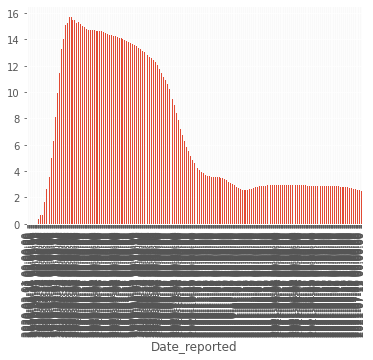

In [23]:
# This looks awful
df_uk['Mortality_rate'].plot(kind = 'bar')

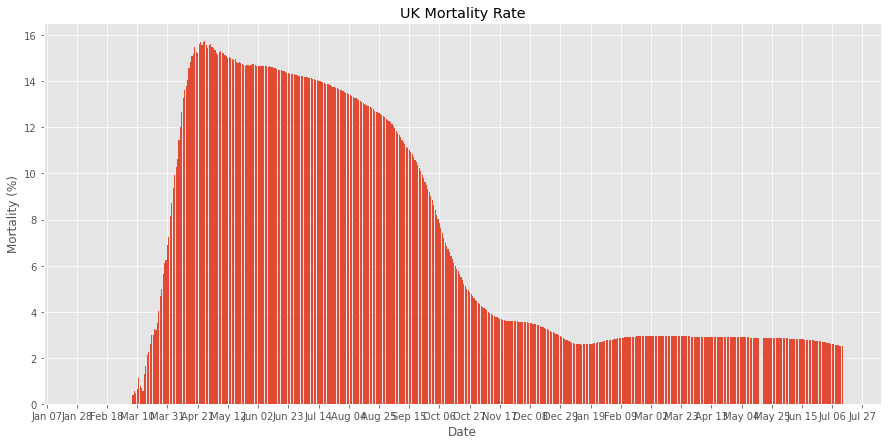

In [24]:
import matplotlib.dates as mdates
# plot data
fig, ax = plt.subplots(figsize = (15,7))
ax.bar(df_uk.index, df_uk['Mortality_rate'])

# set ticks every 3 weeks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval = 3))

# set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# title
ax.set(
  title = 'UK Mortality Rate',
  xlabel = 'Date',
  ylabel = 'Mortality (%)'
)

# Display the plot
plt.show()

## Plotting cases of top 5 countries by case count

In [25]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
132241,2021-07-09,ZW,Zimbabwe,AFRO,2156,62383,56,2029
132242,2021-07-10,ZW,Zimbabwe,AFRO,2683,65066,55,2084
132243,2021-07-11,ZW,Zimbabwe,AFRO,1787,66853,42,2126
132244,2021-07-12,ZW,Zimbabwe,AFRO,912,67765,59,2185


In [26]:
top_5 = ['United States of America', 'India', 'Brazil', 'Russian Federation', 'Argentina']
df.reset_index(inplace = True)
df_top = df.pivot(
    index = 'Date_reported',
    columns = 'Country',
    values = ['Cumulative_cases']
)
df_top

Cumulative_cases                                                \
Country            Afghanistan Albania Algeria American Samoa Andorra Angola   
Date_reported                                                                  
2020-01-03                   0       0       0              0       0      0   
2020-01-04                   0       0       0              0       0      0   
2020-01-05                   0       0       0              0       0      0   
2020-01-06                   0       0       0              0       0      0   
2020-01-07                   0       0       0              0       0      0   
...                        ...     ...     ...            ...     ...    ...   
2021-07-09              131586  132565  143652              0   14050  39593   
2021-07-10              132777  132580  144483              0   14075  39791   
2021-07-11              133578  132587  145296              0   14075  39881   
2021-07-12              134653  132592  146082              0   14075  39958   
2021-07-13              135889  132597  146942              0   14155  40055   

                                                              ...          \
Country       Anguilla Antigua and Barbuda Argentina Armenia  ... Uruguay   
Date_reported                                                 ...           
2020-01-03           0                   0         0       0  ...       0   
2020-01-04           0                   0         0       0  ...       0   
2020-01-05           0                   0         0       0  ...       0   
2020-01-06           0                   0         0       0  ...       0   
2020-01-07           0                   0         0       0  ...       0   
...                ...                 ...       ...     ...  ...     ...   
2021-07-09         111                1265   4593763  226135  ...  374665   
2021-07-10         111                1266   4613019  226285  ...  375298   
2021-07-11         111                1266   4632878  226388  ...  375902   
2021-07-12         111                1266   4639098  226459  ...  376281   
2021-07-13         111                1266   4647948  226597  ...  376579   

                                                                              \
Country       Uzbekistan Vanuatu Venezuela (Bolivarian Republic of) Viet Nam   
Date_reported                                                                  
2020-01-03             0       0                                  0        0   
2020-01-04             0       0                                  0        0   
2020-01-05             0       0                                  0        0   
2020-01-06             0       0                                  0        0   
2020-01-07             0       0                                  0        0   
...                  ...     ...                                ...      ...   
2021-07-09        115011       3                             280980    24810   
2021-07-10        115478       3                             281907    26608   
2021-07-11        115963       3                             282940    28470   
2021-07-12        116421       3                             283742    30478   
2021-07-13        116918       3                             284942    32665   

                                                        \
Country       Wallis and Futuna Yemen  Zambia Zimbabwe   
Date_reported                                            
2020-01-03                    0     0       0        0   
2020-01-04                    0     0       0        0   
2020-01-05                    0     0       0        0   
2020-01-06                    0     0       0        0   
2020-01-07                    0     0       0        0   
...                         ...   ...     ...      ...   
2021-07-09                  454  6936  170456    62383   
2021-07-10                  454  6940  172405    65066   
2021-07-11                  454  6941  174789    66853 

In [27]:
df_top.columns

MultiIndex([('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ...
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...)],
           names=[None, 'Country'], length=237)

<AxesSubplot:xlabel='Date_reported'>

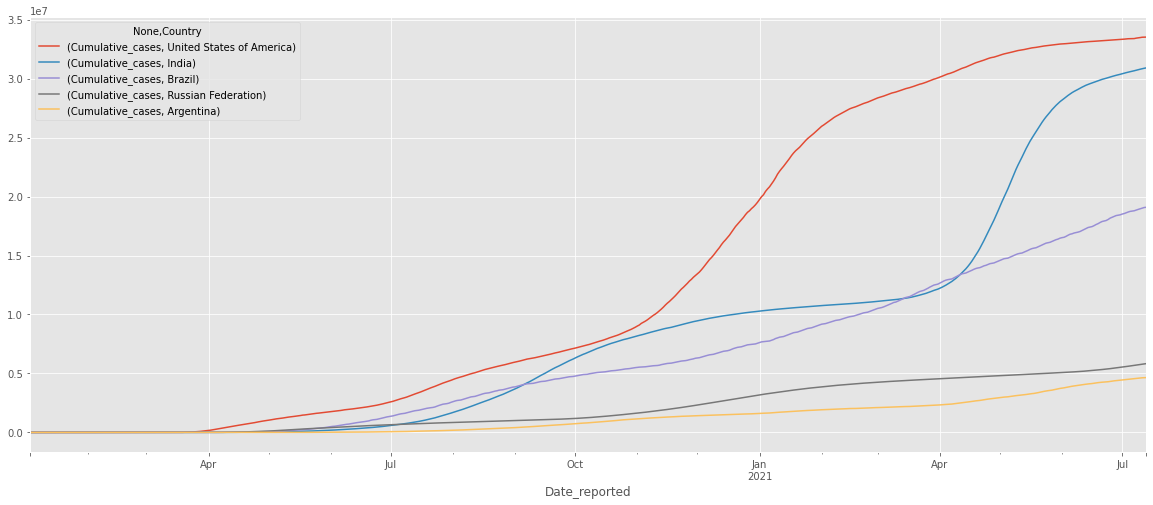

In [28]:
df_top.loc[:, ('Cumulative_cases', top_5)].plot(figsize = (20, 8))

## Reading and parsing the data in one step

In [29]:
df_load_example = pd.read_csv(csv_path, index_col = 0, parse_dates = True)
df_load_example

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2021-07-09,ZW,Zimbabwe,AFRO,2156,62383,56,2029
2021-07-10,ZW,Zimbabwe,AFRO,2683,65066,55,2084
2021-07-11,ZW,Zimbabwe,AFRO,1787,66853,42,2126


In [30]:
csv_path_1 = os.path.join(file_path, 'edited-WHO-Covid_dataframe.csv')
df.to_csv(csv_path_1)